---
<a id='colorspace'></a>
## Color-Space Segmentation Using K-Means Clustering

Color is an extremely sophisticated notion.  It unifies the physical wavelength of light, the biological expression of cell distribution and pigment receptors in the eye, the neurological interpretation of the resulting optic signal, and the psychological factors of culture and perception<sup>[[ref]](https://en.wikipedia.org/wiki/Opponent_process)</sup>.  Unsurprisingly, there are a lot of different ways to represent colors.  Color spaces represent different colors according to essentially different orthogonal bases.  For instance, you’re probably familiar with $RGB$ v. $CMYK$ color spaces.

<table>
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/AdditiveColor.svg/240px-AdditiveColor.svg.png" /></td>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/SubtractiveColor.svg/240px-SubtractiveColor.svg.png" /></td>
</tr>
</table>

But there are many others, such as [$Lab$](https://en.wikipedia.org/wiki/Lab_color_space) and [$XYZ$](https://en.wikipedia.org/wiki/CIE_1931_color_space).  These color spaces do not necessarily cover the same range of [perceptible colors]() (or [imperceptible ones!](https://en.wikipedia.org/wiki/Impossible_color)), but transformations between spaces [can still be defined](http://www.brucelindbloom.com/Math.html).  We will use this below to convert between $RGB$ and $Lab$.

$Lab$ was designed to replicate human vision, and exploits the fact that in a sense there are [four fundamental colors](https://en.wikipedia.org/wiki/Opponent_process) that the human eye can perceive:  a red-green axis $a$ and a blue-yellow axis $b$.  Adding luminosity $L$ to these chromaticity axes yields a three-parameter color space that is actually more expressive than can be represented by $RGB$ triplets.

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from sklearn.cluster import KMeans
%matplotlib inline

from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color
rgbize = np.vectorize(sRGBColor)
convertize = np.vectorize(convert_color)

# Inspired by an example at http://www.mathworks.com/help/images/examples/color-based-segmentation-using-k-means-clustering.html
# Read image and convert it from RGB to Lab representation.
from pylab import imread, imshow, gray, mean
sat_rgb = imread('satellite.png')
plt.figure()
plt.xticks([])
plt.yticks([])
imshow(sat_rgb)
sat_rgb_cs = rgbize(sat_rgb[:,:,0],sat_rgb[:,:,1],sat_rgb[:,:,2])
sat_lab_cs = convertize(sat_rgb_cs, LabColor)

sat_lab = np.ones((sat_lab_cs.shape[0], sat_lab_cs.shape[1], 4))
for i in range(sat_lab_cs.shape[0]):
    for j in range(sat_lab_cs.shape[1]):
        sat_lab[i,j,0] = sat_lab_cs[i,j].lab_l/200+100 #rgb_r
        sat_lab[i,j,1] = sat_lab_cs[i,j].lab_a/200+100 #rgb_g
        sat_lab[i,j,2] = sat_lab_cs[i,j].lab_b/200+100 #rgb_b

ImportError: No module named 'colormath'

NameError: name 'imshow' is not defined

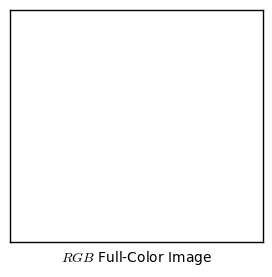

In [2]:
mpl.rcParams['figure.figsize']=(15,3)

# Full-color image
plt.figure()
plt.subplot(1,4,1)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$RGB$ Full-Color Image')
imshow(sat_rgb)

# Red channel
cdict = {'red': ((0.0, 0.0, 0.0),
                 (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),
         'blue': ((0.0, 0.0, 0.0),
                  (1.0, 0.0, 0.0))}
BkRd = mpl.colors.LinearSegmentedColormap('BkRd',cdict,256)
plt.subplot(1,4,2)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$R$')
imshow(sat_rgb[:,:,0], cmap = BkRd)

# Green channel
cdict = {'red': ((0.0, 0.0, 0.0),
                 (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'blue': ((0.0, 0.0, 0.0),
                  (1.0, 0.0, 0.0))}
BkGn = mpl.colors.LinearSegmentedColormap('BkGn',cdict,256)
plt.subplot(1,4,3)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$G$')
imshow(sat_rgb[:,:,1], cmap = BkGn)

# Blue Channel
cdict = {'red': ((0.0, 0.0, 0.0),
                 (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),
         'blue': ((0.0, 0.0, 0.0),
                  (1.0, 1.0, 1.0))}
BkBl = mpl.colors.LinearSegmentedColormap('BkBl',cdict,256)
plt.subplot(1,4,4)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$B$')
imshow(sat_rgb[:,:,2], cmap = BkBl)

# Composite Lab image as RGB
plt.figure()
plt.subplot(1,4,1)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'Composite $Lab$ as $RGB$')
imshow(sat_lab, origin='lower')

# L - luminosity
plt.subplot(1,4,2)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$L$')
imshow(sat_lab[:,:,0], cmap = cm.Greys_r)

# a - red-green axis
cdict = {'red': ((0.0, 0.0, 0.0),
                 (1.0, 1.0, 1.0)),
         'green': ((0.0, 1.0, 1.0),
                   (1.0, 0.0, 0.0)),
         'blue': ((0.0, 0.0, 0.0),
                  (1.0, 0.0, 0.0))}
RdGr = mpl.colors.LinearSegmentedColormap('RdGr',cdict,256)
plt.subplot(1,4,3)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$a$')
imshow(sat_lab[:,:,1], cmap = RdGr)

# b - blue-yellow axis
cdict = {'red': ((0.0, 0.0, 0.0),
                 (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'blue': ((0.0, 1.0, 1.0),
                  (1.0, 0.0, 0.0))}
BlYw = mpl.colors.LinearSegmentedColormap('BlYw',cdict,256)
plt.subplot(1,4,4)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$b$')
imshow(sat_lab[:,:,2], cmap = BlYw)

In [ ]:
# Classify each color into clusters using the K-means algorithm.
from sklearn.cluster import KMeans
ab = sat_lab[:,:,1:3];
ab = np.reshape(ab,(sat_lab.shape[0]*sat_lab.shape[1],2));

# How many major colors do you perceive?
n_colors = 5

# Cluster, repeating 10x to avoid local minima.
kmeans = KMeans(n_clusters=n_colors, n_init=10)
cluster_index = kmeans.fit_predict(ab)

In [ ]:
# Classify pixels by K-means cluster.
pixel_labels = np.reshape(cluster_index,(sat_lab.shape[0],sat_lab.shape[1]))

mpl.rcParams['figure.figsize']=(5,5)
plt.figure
plt.xticks([])
plt.yticks([])
imshow(pixel_labels, cmap = cm.Blues_r)

In [ ]:
# Segment the original image by color cluster.
mpl.rcParams['figure.figsize']=(16,8)
sat_seg = np.zeros((n_colors,sat_rgb.shape[0],sat_rgb.shape[1],sat_rgb.shape[2]))

for k in range(n_colors):
    color_index = np.where(pixel_labels == k)
    sat_seg[k,color_index[0],color_index[1]] = sat_rgb[np.where(pixel_labels == k)]
    
    plt.subplot(2,np.ceil(n_colors/2),k+1)
    plt.xticks([])
    plt.yticks([])
    imshow(sat_seg[k])
plt.tight_layout()